<a href="https://colab.research.google.com/github/cfgramoso/1659-postgresql-primeiros-passos/blob/aula-1/regressao_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projeto Programaria - Introdução ao aprendizado de máquina - Feature Engineering dos dados**

**Acessar o google Drive**

In [193]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [194]:
import pandas as pd

**Ler o arquivo excel**

In [195]:
dados = pd.read_excel('/content/drive/MyDrive/Programaria/analise_dados_mod7_(1).xlsx')

In [196]:
dados.head()

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO_OPORTUNIDADES
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,0.0,0.0
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,1.0,0.0
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,1,0.0,1.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,0,0.0,1.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,0.0,1.0


In [197]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [198]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762
Empreendedor ou Empregado (CNPJ),410
"Desempregado, buscando recolocação",350
Estagiário,188
Servidor Público,156
Trabalho na área Acadêmica/Pesquisador,86
Somente Estudante (graduação),82
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil,69
Vivo fora do Brasil e trabalho para empresa de fora do Brasil,46


**Filtrar somente empregados CLT**

In [199]:
dados=dados[dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?']=='Empregado (CLT)']

In [200]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762


In [201]:
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,1805
Parda,661
Preta,181
Amarela,85
Prefiro não informar,16
Outra,10
Indígena,4


**Filtrar algumas cor/raca/etnia, vamos excluir: 'Prefiro não informar', 'Outra', 'Indígena'**



In [202]:
lista_retirar = ['Prefiro não informar', 'Outra', 'Indígena']

In [203]:
dados=dados[~dados['COR/RACA/ETNIA'].isin(lista_retirar)]

Criar a categoria não branca

In [204]:
dados['NAO_BRANCA']=dados['COR/RACA/ETNIA'].apply(lambda x: 1 if x != 'Branca' else 0)

**Tratar tempo de experiencia na area de dados**

In [205]:
dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].value_counts()

,count
QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,
de 1 a 2 anos,743
de 3 a 4 anos,584
de 4 a 6 anos,416
Menos de 1 ano,353
Mais de 10 anos,277
de 7 a 10 anos,232
Não tenho experiência na área de dados,127


In [206]:
dados['TEMPO_EXPERIENCIA']=dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].str.extract('(\d+)')

In [207]:
dados['TEMPO_EXPERIENCIA'].value_counts(dropna=False)

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232
NaN,127


Tem 127 nulos, então que não tem experiencia, e vamos alterar de nulo para zero (0)*`texto em itálico`*



In [208]:
dados['TEMPO_EXPERIENCIA']=dados['TEMPO_EXPERIENCIA'].fillna(0)

In [209]:
dados['TEMPO_EXPERIENCIA'].value_counts(dropna=False)

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232
0,127



**Tratamento do nr de funcionários**

In [210]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3.000,1313
de 101 a 500,503
de 1.001 a 3.000,368
de 501 a 1.000,248
de 51 a 100,146
de 11 a 50,112
de 6 a 10,24
de 1 a 5,18


Vamos tratar os pontos, de 3.000 para 3000

In [211]:
dados['NUMERO DE FUNCIONARIOS']=dados['NUMERO DE FUNCIONARIOS'].str.replace('.','')

In [212]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3000,1313
de 101 a 500,503
de 1001 a 3000,368
de 501 a 1000,248
de 51 a 100,146
de 11 a 50,112
de 6 a 10,24
de 1 a 5,18


In [213]:
dados['NUMERO DE FUNCIONARIOS']=dados['NUMERO DE FUNCIONARIOS'].str.extract('(\d+)')

In [214]:
dados['NUMERO DE FUNCIONARIOS'].value_counts(dropna=False)

,count
NUMERO DE FUNCIONARIOS,
3000,1313
101,503
1001,368
501,248
51,146
11,112
6,24
1,18


**Tratar o motivo da insatisfação na empresa atual**

In [215]:
dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].value_counts(dropna=False)

,count
Qual o principal motivo da sua insatisfação com a empresa atual?,
NaN,2071
Gostaria de trabalhar em em outra área de atuação,69
Salário atual não corresponde ao mercado,53
Falta de oportunidade de crescimento no emprego atual,46
Falta de maturidade analítica na empresa,45
...,...
Trabalho explora pouco minhas habilidades e me dá poucas oportunidades de atuação distintas,1
"Não tenho uma boa relação com meu líder/gestor, Gostaria de receber mais benefícios, Salário atual não corresponde ao mercado",1
"Não tenho uma boa relação com meu líder/gestor, Gostaria de trabalhar em em outra área de atuação",1


**Criar uma coluna insatisfação, e depois tratar todo o texto que conter salário será tratado como insatisfação com salário**

In [216]:
dados['INSATISFACAO']=0

In [217]:
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in x else 0)

,Qual o principal motivo da sua insatisfação com a empresa atual?
1,0
2,0
7,1
10,0
26,1
...,...
4227,0
4234,1
4238,0
4240,1


In [218]:
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),'INSATISFACAO']=dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in x else 0)

In [219]:
dados['INSATISFACAO'].value_counts()

,count
INSATISFACAO,
0,2453
1,279


Tratamento da coluna Nivel de ensino

In [220]:
dados['NIVEL DE ENSINO'].value_counts(dropna=False)

,count
NIVEL DE ENSINO,
Graduação/Bacharelado,1024
Pós-graduação,975
Mestrado,306
Estudante de Graduação,271
Doutorado ou Phd,100
Não tenho graduação formal,52
Prefiro não informar,4


In [221]:
dados['NIVEL_ENSINO']=dados['NIVEL DE ENSINO'].apply(lambda x:
                                0 if x == 'Não tenho graduação formal' else
                                1 if x == 'Estudante de Graduação' else
                                2 if x == 'Graduação/Bacharelado' else
                                3 if x == 'Pós-graduação' else
                                4 if x == 'Mestrado' else
                                5 if x == 'Doutorado ou Phd' else -1)


In [222]:
dados['NIVEL_ENSINO'].value_counts(dropna=False)

,count
NIVEL_ENSINO,
2,1024
3,975
4,306
1,271
5,100
0,52
-1,4


**Separar as colunas que serão atributos do modelo**

In [223]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [224]:
dados = dados[['IDADE', 'GENERO', 'NAO_BRANCA','TEMPO_EXPERIENCIA', 'INSATISFACAO', 'SETOR', 'REGIAO ONDE MORA','NIVEL_ENSINO',
      'NUMERO DE FUNCIONARIOS','NOVO_NIVEL','SALARIO']]

In [225]:
dados.columns

Index(['IDADE', 'GENERO', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFACAO',
       'SETOR', 'REGIAO ONDE MORA', 'NIVEL_ENSINO', 'NUMERO DE FUNCIONARIOS',
       'NOVO_NIVEL', 'SALARIO'],
      dtype='object')

In [226]:
pd.get_dummies(dados, columns=['GENERO','SETOR','NOVO_NIVEL','REGIAO ONDE MORA'], drop_first=True)

,IDADE,NAO_BRANCA,TEMPO_EXPERIENCIA,INSATISFACAO,NIVEL_ENSINO,NUMERO DE FUNCIONARIOS,SALARIO,GENERO_Masculino,GENERO_Prefiro não informar,SETOR_Educação,...,SETOR_Varejo,SETOR_Área da Saúde,SETOR_Área de Consultoria,NOVO_NIVEL_Pessoa Gestora,NOVO_NIVEL_Pleno,NOVO_NIVEL_Sênior,REGIAO ONDE MORA_Nordeste,REGIAO ONDE MORA_Norte,REGIAO ONDE MORA_Sudeste,REGIAO ONDE MORA_Sul
1,32.0,1,3,0,2,3000,4695.0,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2,53.0,0,3,0,3,3000,14202.0,True,False,False,...,False,False,False,False,True,False,False,False,False,False
3,27.0,0,4,0,5,3000,15463.0,True,False,False,...,False,False,False,False,False,True,False,False,True,False
6,21.0,1,1,0,1,3000,4491.0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
7,31.0,0,1,1,2,6,2704.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,31.0,1,3,0,3,501,18402.0,True,False,False,...,False,False,False,True,False,False,False,False,True,False
4263,26.0,1,3,0,2,501,6641.0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4266,26.0,0,3,0,2,3000,4329.0,True,False,False,...,False,False,False,False,True,False,False,False,True,False
4267,30.0,0,1,0,4,51,3758.0,False,False,False,...,False,False,True,False,True,False,False,False,True,False


In [227]:
dados = pd.get_dummies(dados, columns=['GENERO','SETOR','NOVO_NIVEL','REGIAO ONDE MORA'], drop_first=True)

**Vamos separar em dados de treinamento, utilizado pelo modelo para aprender, dados de teste, utilizado para avaliar o desempenho do modelo**

Vamos separar os atributos (genero, setor, etc) do nosso objetivo (salario)

➡️Nós importamos a função LinearRegression da biblioteca sklearn, criamos um objeto chamado model apartir dessa função. E então enviando os parâmetros de treino na função fit (assim: model.fit(X_train_scaled, y_train)) nós conseguimos treinar o modelo.

➡️Usando a função predict e enviando como parâmetro o conjunto de teste (X_test_scaled) a gente conseguiu fazer as predições desse conjunto.

➡️E então partimos para uma parte muito importante de qualquer modelo de machine learning que é a avaliação do modelo, para saber se está bom ou ruim (ou mais ou menos, ou médio, ou excelente, ou … enfim, vocês entenderam, certo?😂) Focamos em três métricas principais para avaliação de modelos de regressão:

MSE (Mean Squared Error), MAE (Mean Absolute Error) e R² (R-squared). Com os resultados nós concluímos que para um modelo real de produção nosso modelo não seria aceitável.

In [228]:
X = dados.drop('SALARIO', axis=1) # Atributos, exclui a coluna SALARIO
y = dados['SALARIO'] # Nosso objetivo que é o SALARIO

In [229]:
from sklearn.model_selection import train_test_split

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [232]:
from sklearn.preprocessing import StandardScaler # essa funcao tem como caracterisitica padronizar as caracteristicas, vai normalizar os dados

In [234]:
scaler = StandardScaler()
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.fit_transform(X_test)

Treinar o modelo

In [235]:
from sklearn.linear_model import LinearRegression

In [236]:
model = LinearRegression()

In [237]:
model.fit (X_train_scaled, y_train)

LinearRegression()

In [238]:
model.predict (X_test_scaled)

array([21747.09955485, 16393.11133947,  3322.57047577,  4070.47453441,
       17456.19496593,  6983.80212226,  2895.99031002, 13153.66461021,
        2877.9092721 , 11369.42506472,  8810.37673337,  8889.0254039 ,
        8208.14893701, 18222.19249943, 18043.82669965,  8547.27229238,
       10852.30444684,  6617.36584584,  4625.9954692 , 13323.22681603,
        7195.39308176, 11065.52644244, 18377.46883881,  9352.55542353,
        9167.82728996, 22734.71129187,  9753.50647653, 11639.15276746,
       10102.19278383, 19826.59479755, 13074.70339455, 12732.60397625,
       18814.72054547,  5688.02809659,  5513.0550523 ,  3798.25066321,
       16433.57854552,  9712.53760549, 11600.32636999,  3345.07582467,
        7962.7143068 ,  8704.55524691,  5210.72145032,  6547.51938246,
       13349.11767882, 11420.03453199, 14284.61387643,  1406.89023734,
        5841.75882136, 23072.17785964,  8973.76843396, 10897.99012048,
       19191.98953638,  8864.87517892, 18019.58277215, 13090.32115152,
      

In [239]:
y_pred = model.predict (X_test_scaled)

In [245]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [246]:
mse = mean_squared_error(y_test, y_pred)
mse

23048733.978297196

In [247]:
mae = mean_absolute_error(y_test, y_pred)
mae

3298.964464206939

In [244]:
r2 = r2_score(y_test, y_pred)
r2

0.5297347873934934

➡️Plotamos um gráfico dos valores reais versus os valores preditos pelo modelo e conseguimos perceber que até certo valor de salário, os valores preditos e os reais tem uma certa sintonia. Porém para valores muito altos de salários, as predições são muito distantes.

➡️Para conseguir analisar melhor o modelo, nós pegamos os coeficientes (pesos) de cada atributo, assim a gente conseguiu avaliar quais atributos tiveram mais peso positivo ou negativo para o resultado do modelo. Fizemos um gráfico bem bonito pra deixar mais visual essa questão dos coeficientes e conseguimos observar quais atributos pesaram mais para o negativo e quais pesaram mais para o positivo.

➡️Para finalizar, nós fizemos uma reflexão de que o modelo que nós treinamos foi utilizado para análise. Buscando entender no mundo real de hoje o que influencia o salário, olhamos os coeficientes e o que pesa para negativo e positivo.

💭Se um modelo para estimar o salário de uma pessoa, para ser usado na vida real, por exemplo, o salário da equipe da programaria vai ser estimado por um modelo, a gente teria que ter muito cuidado com ética para não reproduzir os vieses do mundo real.


📑 Transcrição do vídeo 📑

Para a transcrição do vídeo, é só acessar o arquivo em anexo aqui na aula, mesmo :)


🌌 Referências para ir ao infinito e além 🌌


Entendendo Regressão Linear: as suposições por trás de tudo! | by Laura Damaceno | Medium

In [248]:
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show(close=None, block=None)>

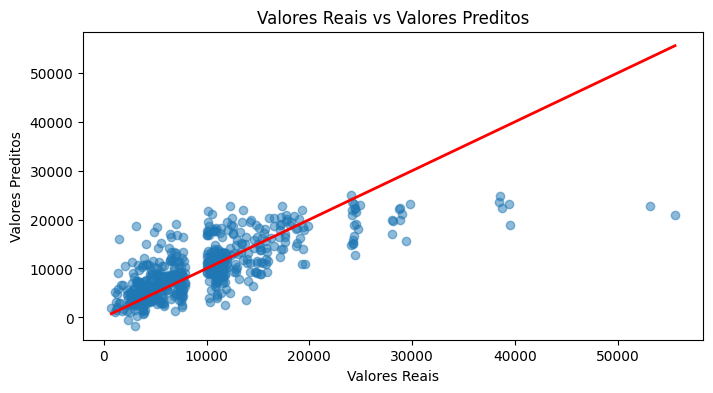

In [252]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Valores Reais vs Valores Preditos')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red',linewidth=2)
plt.show

In [254]:
nomes_atributos = X_train.columns
nomes_atributos

Index(['IDADE', 'NAO_BRANCA', 'TEMPO_EXPERIENCIA', 'INSATISFACAO',
       'NIVEL_ENSINO', 'NUMERO DE FUNCIONARIOS', 'GENERO_Masculino',
       'GENERO_Prefiro não informar', 'SETOR_Educação',
       'SETOR_Entretenimento ou Esportes', 'SETOR_Filantropia/ONG's',
       'SETOR_Finanças ou Bancos', 'SETOR_Indústria',
       'SETOR_Internet/Ecommerce', 'SETOR_Marketing', 'SETOR_Outra Opção',
       'SETOR_Seguros ou Previdência', 'SETOR_Setor Alimentício',
       'SETOR_Setor Automotivo', 'SETOR_Setor Farmaceutico',
       'SETOR_Setor Imobiliário/ Construção Civil', 'SETOR_Setor Público',
       'SETOR_Setor de Energia', 'SETOR_Tecnologia/Fábrica de Software',
       'SETOR_Telecomunicação', 'SETOR_Varejo', 'SETOR_Área da Saúde',
       'SETOR_Área de Consultoria', 'NOVO_NIVEL_Pessoa Gestora',
       'NOVO_NIVEL_Pleno', 'NOVO_NIVEL_Sênior', 'REGIAO ONDE MORA_Nordeste',
       'REGIAO ONDE MORA_Norte', 'REGIAO ONDE MORA_Sudeste',
       'REGIAO ONDE MORA_Sul'],
      dtype='object')

In [255]:
pd.DataFrame(model.coef_, columns = ['coeficientes'], index=nomes_atributos)

,coeficientes
IDADE,-133.027283
NAO_BRANCA,-423.401696
TEMPO_EXPERIENCIA,2004.015472
INSATISFACAO,-535.533311
NIVEL_ENSINO,843.824926
NUMERO DE FUNCIONARIOS,797.206111
GENERO_Masculino,555.450771
GENERO_Prefiro não informar,92.976498
SETOR_Educação,-157.506247
SETOR_Entretenimento ou Esportes,231.353518


In [256]:
coefs = pd.DataFrame(model.coef_, columns = ['coeficientes'], index=nomes_atributos)

In [257]:
coefs.sort_values('coeficientes', ascending=False)

,coeficientes
NOVO_NIVEL_Pessoa Gestora,3965.837560
NOVO_NIVEL_Sênior,2008.062980
TEMPO_EXPERIENCIA,2004.015472
NOVO_NIVEL_Pleno,900.352033
NIVEL_ENSINO,843.824926
NUMERO DE FUNCIONARIOS,797.206111
SETOR_Finanças ou Bancos,727.227138
SETOR_Internet/Ecommerce,693.103642
SETOR_Tecnologia/Fábrica de Software,637.817363
GENERO_Masculino,555.450771


In [258]:
coefs = coefs.sort_values('coeficientes', ascending=False)

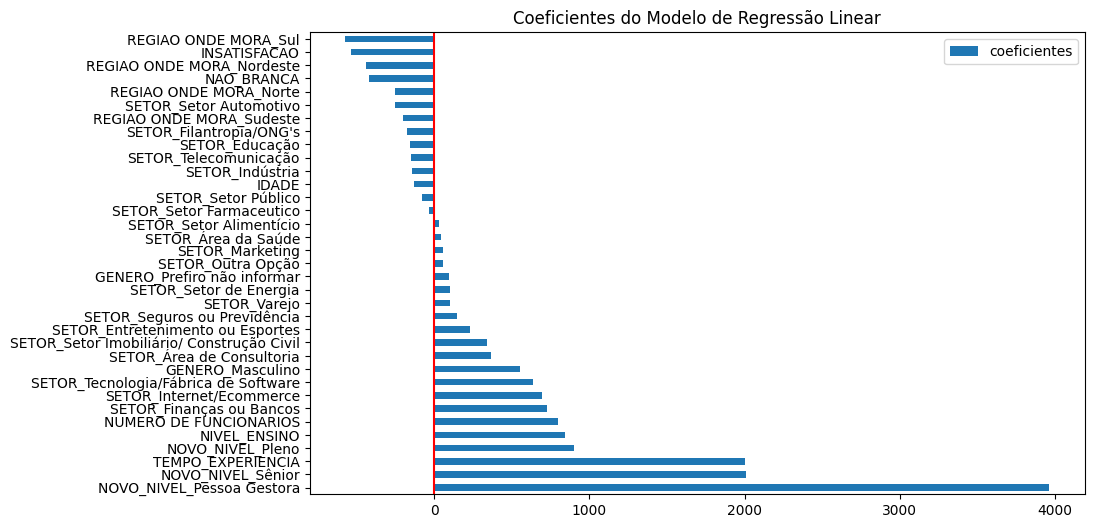

In [260]:
coefs.plot.barh(figsize=(10,6))
plt.axvline(x=0, color='red')
plt.title('Coeficientes do Modelo de Regressão Linear')
plt.show()